In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [3]:
model=ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [4]:
import os
from dotenv import load_dotenv
from openai import OpenAI

class GemmaRouter:
    """
    A simple wrapper for using Google's Gemma-2-2B-IT model
    via Hugging Face's OpenAI-compatible inference API.
    """

    def __init__(
        self,
        model: str = "google/gemma-2-2b-it:nebius",
        token_env: str = "HF_THIRD_TOKEN",
        base_url: str = "https://router.huggingface.co/v1",
    ):
        load_dotenv()
        api_key = os.getenv(token_env)
        if not api_key:
            raise ValueError(
                f"Missing token: environment variable '{token_env}' not found."
            )

        self.client = OpenAI(base_url=base_url, api_key=api_key)
        self.model = model

    def invoke(self, prompt: str, temperature: float = 0.7, max_tokens: int = 256):
        """Non-streaming response."""
        completion = self.client.chat.completions.create(
            model=self.model,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature,
            max_tokens=max_tokens,
        )
        return completion.choices[0].message.content.strip()

    def stream_invoke(self, prompt: str, temperature: float = 0.7, max_tokens: int = 256):
        """Streaming response."""
        stream = self.client.chat.completions.create(
            model=self.model,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature,
            max_tokens=max_tokens,
            stream=True,
        )
        return stream



In [5]:
model2=GemmaRouter()

In [12]:
model2.invoke("how good is this model that i am using")

"It's great that you're curious about your own AI language model!  \n\nTo give you a helpful answer, I need more context.  \n\n**Tell me:**\n\n* **What is the model's name?** (e.g., Bard, ChatGPT, a specific model from a company)\n* **What are you trying to do?** (e.g., write creative text, translate languages, answer questions, summarize articles)\n* **What are your expectations?** (e.g., accuracy, creativity, topic knowledge)\n\n **Here's a general idea of how large language models like me work:**\n\n* **They're trained on massive amounts of text data.** This helps them understand and generate human-like language.\n* **Different models have different strengths and weaknesses.** Some excel at conversation, others at writing summaries.\n* **They're constantly learning and improving.** New data and training methods are always evolving.\n\n**Evaluating a model is subjective and depends on your specific needs.**  \n\nOnce you provide more information about your model and what you want to 

In [7]:
from typing import TypedDict,Dict
from langgraph.graph import StateGraph,START,END

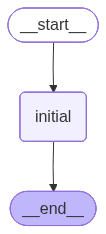

In [8]:
class MsgState(TypedDict):
    message: str

def greetingnode(state: MsgState) -> MsgState:
    """Simple node that adds greeting message to state"""
    state['message'] = "Hello " + state['message'] + ". Welcome to Langgraph"
    return state

# Build graph
graph = StateGraph(MsgState)
graph.add_node('initial', greetingnode)

graph.add_edge(START, 'initial')
graph.add_edge('initial', END)

bot = graph.compile()
bot


In [9]:
response=bot.invoke({"message":"Raghav"})
print(response)

{'message': 'Hello Raghav. Welcome to Langgraph'}
